In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf


In [2]:
# Define the time period and stock symbol
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
symbol = 'ZOMATO.NS'

# Download stock data
stk_data = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Selecting specific columns
stk_data = stk_data[["Open", "High", "Low", "Close"]]

In [4]:
stk_data 

Price,Open,High,Low,Close
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
Date,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000
2021-07-26,126.349998,143.750000,125.300003,140.649994
2021-07-27,141.699997,147.800003,127.750000,132.899994
2021-07-28,131.000000,135.000000,123.550003,131.199997
2021-07-29,134.949997,144.000000,132.199997,141.550003
...,...,...,...,...
2021-12-29,132.699997,137.699997,131.550003,137.100006
2021-12-30,137.050003,137.050003,133.300003,133.949997


In [5]:
 # Adjust to your column names
new_headers = ['Open','High','Low','Close'] 
stk_data.columns = new_headers

In [6]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000
2021-07-26,126.349998,143.750000,125.300003,140.649994
2021-07-27,141.699997,147.800003,127.750000,132.899994
2021-07-28,131.000000,135.000000,123.550003,131.199997
2021-07-29,134.949997,144.000000,132.199997,141.550003
...,...,...,...,...
2021-12-29,132.699997,137.699997,131.550003,137.100006
2021-12-30,137.050003,137.050003,133.300003,133.949997
2021-12-31,133.850006,138.399994,133.399994,137.399994


In [7]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 2021-07-23 to 2022-01-04
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    113 non-null    float64
 1   High    113 non-null    float64
 2   Low     113 non-null    float64
 3   Close   113 non-null    float64
dtypes: float64(4)
memory usage: 4.4 KB


In [8]:
column="Close"

In [9]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (113, 1)


In [10]:
len(data1)

113

In [11]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

90
X_train length: (90, 1)
X_test length: (23, 1)
y_train length: (90, 1)
y_test length: (23, 1)


In [12]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)
   
    for td in trends:
        
        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
        print("************")

Lag=1,Trend=n
RMSE-Testset: 0.19251609203137685
maPe-Testset: 0.768535952577727
************
Lag=1,Trend=t
RMSE-Testset: 0.4665793787161691
maPe-Testset: 1.799199262083117
************
Lag=1,Trend=c
RMSE-Testset: 0.1634610783923719
maPe-Testset: 0.6639593710311931
************
Lag=1,Trend=ct
RMSE-Testset: 0.3352723455372118
maPe-Testset: 1.3237565688623618
************
Lag=2,Trend=n
RMSE-Testset: 0.24896390668132878
maPe-Testset: 1.0019241023961172
************
Lag=2,Trend=t
RMSE-Testset: 0.4690383079995557
maPe-Testset: 1.8082528748117475
************
Lag=2,Trend=c
RMSE-Testset: 0.18093095580387245
maPe-Testset: 0.7344545407700153
************
Lag=2,Trend=ct
RMSE-Testset: 0.38470734190310324
maPe-Testset: 1.5056744200754035
************
Lag=3,Trend=n
RMSE-Testset: 0.31340550421377006
maPe-Testset: 1.2550425781644325
************
Lag=3,Trend=t
RMSE-Testset: 0.4763447403664079
maPe-Testset: 1.8348081020466627
************
Lag=3,Trend=c
RMSE-Testset: 0.20299411839578246
maPe-Testset: 0.8

C:\Users\Dell\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Dell\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Dell\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Dell\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the r

In [13]:
len(y_pred)

23

In [34]:
i=1
td='c'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=1,Trend=c
RMSE-Testset: 0.1634610783923719
maPe-Testset: 0.6639593710311931
************


C:\Users\Dell\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Dell\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


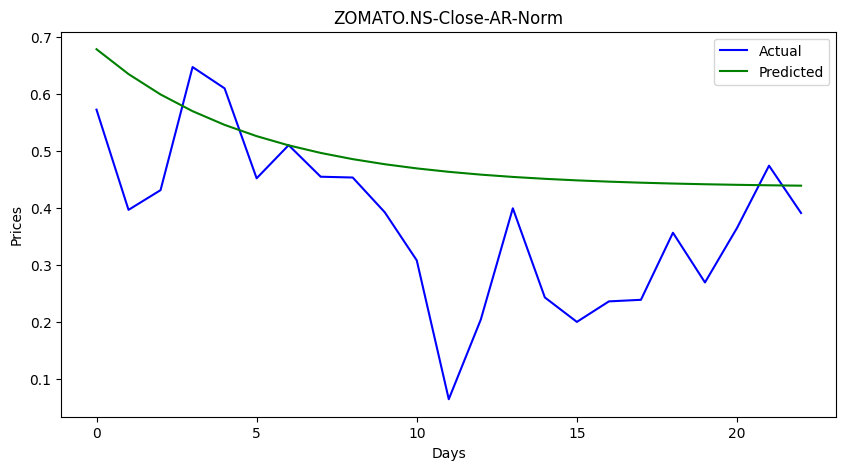

In [35]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","ZOMATO.NS-Close-AR-Norm","Days","Prices")

In [36]:
len(data1)

113

In [37]:
y_test

array([[0.57281532],
       [0.39667134],
       [0.4313454 ],
       [0.64771163],
       [0.61026347],
       [0.45214984],
       [0.51040201],
       [0.45492351],
       [0.45353689],
       [0.3925102 ],
       [0.30790583],
       [0.06380036],
       [0.20388365],
       [0.39944501],
       [0.24271843],
       [0.19972251],
       [0.23578361],
       [0.23855771],
       [0.35644951],
       [0.26907063],
       [0.36477095],
       [0.47434132],
       [0.39112358]])

In [38]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [39]:
aTestNormTable

,Close
0,0.572815
1,0.396671
2,0.431345
3,0.647712
4,0.610263
5,0.45215
6,0.510402
7,0.454924
8,0.453537
9,0.39251


In [40]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [41]:
actual_stock_price_test_ori

array([[144.8999939 ],
       [138.55000305],
       [139.80000305],
       [147.6000061 ],
       [146.25      ],
       [140.55000305],
       [142.6499939 ],
       [140.6499939 ],
       [140.6000061 ],
       [138.3999939 ],
       [135.3500061 ],
       [126.55000305],
       [131.6000061 ],
       [138.6499939 ],
       [133.        ],
       [131.44999695],
       [132.75      ],
       [132.8500061 ],
       [137.1000061 ],
       [133.94999695],
       [137.3999939 ],
       [141.3500061 ],
       [138.3500061 ]])

In [42]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [43]:
actual_stock_price_test_oriA

,Close
0,144.899994
1,138.550003
2,139.800003
3,147.600006
4,146.25
5,140.550003
6,142.649994
7,140.649994
8,140.600006
9,138.399994


In [44]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [45]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

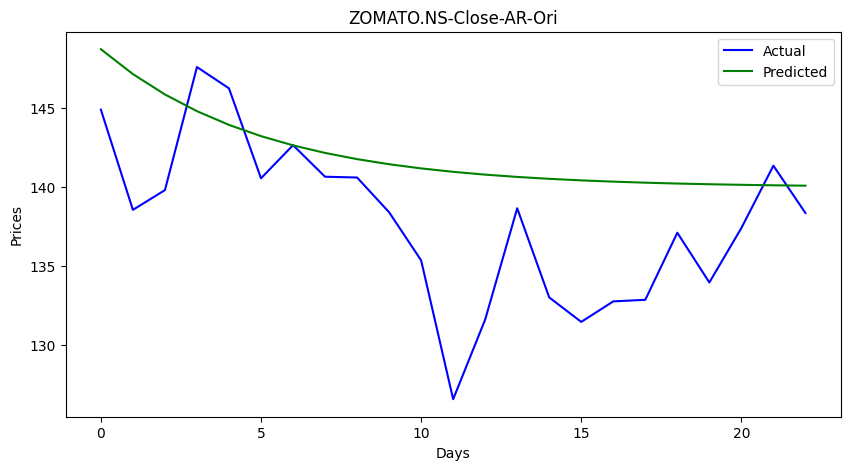

In [46]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","ZOMATO.NS-Close-AR-Ori","Days","Prices")

In [47]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 5.892772374888629
maPe-Testset: 0.035479009835495685


C:\Users\Dell\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [48]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [49]:
forecast

array([0.43862625, 0.43816865, 0.43779334, 0.43748551])

In [50]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [51]:
forecast_stock_price_test_oriF

,Closefore
0,140.062477
1,140.045981
2,140.032451
3,140.021354


In [52]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

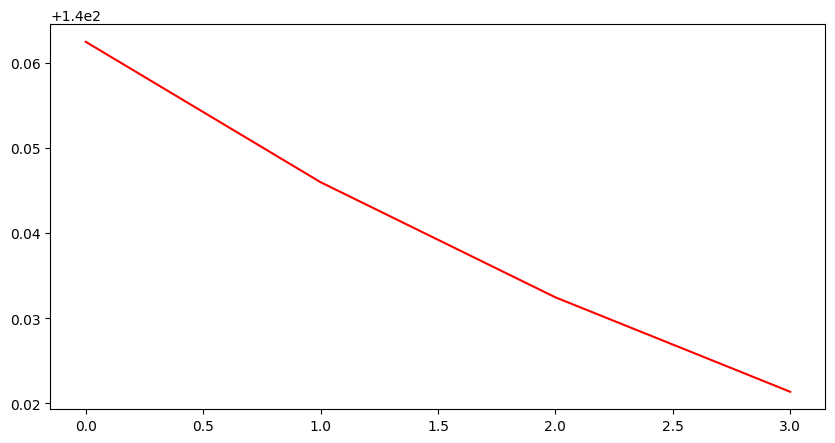

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")